## Part One

### Set Up

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from IPython.display import display
import seaborn as sn

In [53]:
# Files to Load 
continent_file = "Resources/continent_code.csv"
climate_file = "Resources/country_climate.csv"
export_file = "Resources/country_export.csv"
industry_file = "Resources/country_industry.csv"
consumption_file = "Resources/country_consumption.csv"
happiness_file = "Resources/country_happiness.csv"
mental_health_file = "Resources/mental_health.csv"

# Read csv and store into Pandas DataFrames
continent_data = pd.read_csv(continent_file)
climate_data = pd.read_csv(climate_file)
export_data = pd.read_csv(export_file)
industry_data = pd.read_csv(industry_file)
consumption_data = pd.read_csv(consumption_file)
happiness_data = pd.read_csv(happiness_file)
mental_health_data = pd.read_csv(mental_health_file)

### Clean Dataframes 

In [54]:
# Clean Dataframes before merge - continent_df
continent_df = continent_data[["Continent_Name","Three_Letter_Country_Code"]] 
continent_df = continent_df.rename(columns={"Three_Letter_Country_Code": "country_code", "Continent_Name": "continent" })

# Clean Dataframes before merge - climate_df
climate_df = climate_data[["COUNTRY","CLIMATE"]]
climate_df  = climate_df.rename(columns={"COUNTRY": "country", "CLIMATE": "climate" })

# Clean Dataframes before merge - consumption_df 
consumption_df  = consumption_data.rename(columns={"Entity": "country", "Code": "country_code", 
                                                   "Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)": "consumption_per_capita_(L)"})

# Clean Dataframes before merge - happiness_df 
happiness_df = happiness_data[["Country name", "Regional indicator", "Ladder score", "Healthy life expectancy","Logged GDP per capita"]]
happiness_df = happiness_df.rename(columns= {"Country name": "country", "Regional indicator": "region", "Ladder score": "happy_score", "Healthy life expectancy": "life_expectancy", "Logged GDP per capita" : "gdp_per_capita"})
 

In [77]:
# Clean Dataframes before merge - wellness_df
wellness_df = mental_health_data.rename(columns={"Entity":"country", "Code": "code", "Year": "year", 
                                                 "Prevalence - Mental and substance use disorders - Sex: Both - Age: Age-standardized (Percent)": "mental_health_and_addiction (%)"})
to_drop = ["Andean Latin America", "Australasia", "Caribbean", "Central Asia", "Central Europe", "Central Europe, Eastern Europe, and Central Asia",
            "Central Latin America", "Central Sub-Saharan Africa", "East Asia", "Eastern Europe", "Eastern Sub-Saharan Africa",
            "England", "High SDI", "High Income", "High-income Asia Pacific", "High-middle SDI", "Latin America and Caribbean",
            "Low SDI", "Low-middle SDI", "Middle SDI", "North Africa and Middle East", "North America", "Northern Ireland", "Oceania",
            "Scotland", "South Asia", "Southeast Asia", "Southeast Asia, East Asia, and Oceania", "Southern Latin America", 
            "Southern Sub-Saharan Africa", "Sub-Saharan Africa", "Tropical Latin America", "Wales", "Western Europe", "Western Sub-Saharan Africa",
            "World"] 
wellness_df = wellness_df[~wellness_df['country'].isin(to_drop)]
wellness_df = wellness_df[wellness_df['code'].notna()]

# Create a new dataframe to show the avg percentage of mental health and addiction observed for each country
wellness_subset = wellness_df.groupby(['code'])
average_wellness_df = wellness_subset.mean()
country_mask = wellness_df.groupby("country")
wellness_df = country_mask.first() 

wellness_df = wellness_df.drop(columns=['year'])

wellness_df

,code,mental_health_and_addiction (%)
country,,
Afghanistan,AFG,17.553463
Albania,ALB,10.987610
Algeria,DZA,14.700388
American Samoa,ASM,10.822003
Andorra,AND,14.726869
...,...,...
Venezuela,VEN,11.014506
Vietnam,VNM,10.847799
Yemen,YEM,15.819471


### Merge DataFrames
* df_2 = continent_df + consumption_df
* df_3 = continent_df + consumption_df + climate_df
* df_4 = continent_df + consumption_df + climate_df + export_data
* df_5 = continent_df + consumption_df + climate_df + export_data + industry_data
* df_6 = continent_df + consumption_df + climate_df + export_data + industry_data + happiness_df
* df_7 = continent_df + consumption_df + climate_df + export_data + industry_data + happiness_df + wellness_df

In [79]:
# Combine the data into a single dataset. Identify/eliminate incomplete rows  
df_2 = pd.merge(continent_df, consumption_df, how="outer", on=["country_code", "country_code"])  
# df_2.count() 
# df_2 = df_2.dropna(how='any')

df_3 = pd.merge(df_2, climate_df, how="outer", on=["country", "country"]) 

df_4 = pd.merge(df_3, export_data, how="outer", on=["country", "country"]) 

df_5 = pd.merge(df_4, industry_data, how="outer", on=["country", "country"]) 

df_6 = pd.merge(df_5, happiness_df, how="outer", on=["country", "country"]) 

df_7 = pd.merge(df_6, wellness_df, how="outer", on=["country", "country"]) 



In [80]:
# Remove all rows where continent == 'Antartica'
to_drop = ['Antarctica']
df_8 = df_7[~df_7['continent'].isin(to_drop)]

df_8.count() 


continent                          4937
country_code                       4754
country                             485
consumption_per_capita_(L)          378
climate                            3637
main_export                         196
main_industry                       240
region                              160
happy_score                         160
life_expectancy                     160
gdp_per_capita                      160
code                                202
mental_health_and_addiction (%)     202
dtype: int64

In [81]:
# Remove all rows where there is no value for alcohol consumption 
df_9 = df_8[df_8['consumption_per_capita_(L)'].notna()] 
df_9.count() 


continent                          377
country_code                       194
country                            378
consumption_per_capita_(L)         378
climate                            188
main_export                        172
main_industry                      183
region                             148
happy_score                        148
life_expectancy                    148
gdp_per_capita                     148
code                               190
mental_health_and_addiction (%)    190
dtype: int64

In [82]:
# Remove all non-countries within 'country' column
to_drop = ['Arab World', 'Caribbean small states', 'Central Europe and the Baltics', 'Early-demographic dividend',
          'East Asia & Pacific', 'East Asia & Pacific (IDA & IBRD)', 'East Asia & Pacific (excluding high income)',
          'Euro area', 'Europe & Central Asia', 'Europe & Central Asia (IDA & IBRD)', 'Europe & Central Asia (excluding high income)',
          'European Union', 'Fragile and conflict affected situations', 'Heavily indebted poor countries (HIPC)', 'High income',
          'IBRD only', 'IDA & IBRD total', 'IDA blend', 'IDA only', 'IDA total', 'Late-demographic dividend', 'Latin America & Caribbean', 'Latin America & Caribbean (IDA & IBRD)', 'Latin America & Caribbean (excluding high income)',
          'Least developed countries: UN classification', 'Low & middle income', 'Low income', 'Lower middle income','Middle East & North Africa', 'Middle East & North Africa (IDA & IBRD)','Middle East & North Africa (excluding high income)',
          'Middle income', 'North America', 'OECD members', 'Other small states', 'Pacific island small states',
          'Post-demographic dividend', 'Pre-demographic dividend','Small states', 'South Asia', 'South Asia (IDA & IBRD)',
          'Sub-Saharan Africa', 'Sub-Saharan Africa (IDA & IBRD)', 'Sub-Saharan Africa (excluding high income)',
          'Syrian Arab Republic', 'Upper middle income', 'World']
df_10 = df_9[~df_9['country'].isin(to_drop)]

df_10.count() 


continent                          193
country_code                       193
country                            193
consumption_per_capita_(L)         193
climate                            183
main_export                        172
main_industry                      183
region                             148
happy_score                        148
life_expectancy                    148
gdp_per_capita                     148
code                               190
mental_health_and_addiction (%)    190
dtype: int64

In [83]:
# Remove all duplicate countries --> Azerbaijan, Armenia, Cypress, Georgia, Kazakstan, Turkey
df_11 = df_10.drop_duplicates(subset=['country'])
df_11.head()

,continent,country_code,country,consumption_per_capita_(L),climate,main_export,main_industry,region,happy_score,life_expectancy,gdp_per_capita,code,mental_health_and_addiction (%)
0,Asia,AFG,Afghanistan,0.2,arid to semiarid; cold winters and hot summers,Fruit and nuts,small-scale production of bricks,South Asia,2.5669,52.590000,7.462861,AFG,17.553463
1,Europe,ALB,Albania,7.5,"mild temperate; cool, cloudy, wet winters; hot...",Chromium and chrome products,perfumes and cosmetic products,Central and Eastern Europe,4.8827,68.708138,9.417931,ALB,10.987610
4942,Africa,DZA,Algeria,0.9,"arid to semiarid; mild, wet winters with hot, ...",Oil,petroleum,Middle East and North Africa,5.0051,65.905174,9.537965,DZA,14.700388
4943,Europe,AND,Andorra,11.3,"temperate; snowy, cold winters and warm, dry s...",Tobacco products,tourism,NaN,NaN,NaN,NaN,AND,14.726869
4944,Africa,AGO,Angola,6.4,semiarid in south and along coast to Luanda; n...,Oil,petroleum,NaN,NaN,NaN,NaN,AGO,12.498281


In [84]:
# Save Data to csv
df_11.to_csv("mega_df.csv")

## Part Two - Data Summary

* Calculate how many rows of data there are
* Display a list of columns
* Display a list of countries
* Calculate total number of countries
* Calculate the measures of central tendency for alcohol expenditure as a percent of total household expenditure for each country
* Calculate the overall average alcohol expenditure as a percent of total household expenditure 
* Calculate overall average alcohol consumption
* Calculate total years of data compiled for each country 
* Determine which year(s) have the most data 


####  Calculate how many rows of data there are

In [85]:
total_rows = df_11.shape[0] 
print(f'The total number of rows represented in the dataset are: {total_rows}')  

The total number of rows represented in the dataset are: 186


####  Display a list of columns

In [86]:
df_11.columns

Index(['continent', 'country_code', 'country', 'consumption_per_capita_(L)',
       'climate', 'main_export', 'main_industry', 'region', 'happy_score',
       'life_expectancy', 'gdp_per_capita', 'code',
       'mental_health_and_addiction (%)'],
      dtype='object')

In [87]:
df_11.head()

,continent,country_code,country,consumption_per_capita_(L),climate,main_export,main_industry,region,happy_score,life_expectancy,gdp_per_capita,code,mental_health_and_addiction (%)
0,Asia,AFG,Afghanistan,0.2,arid to semiarid; cold winters and hot summers,Fruit and nuts,small-scale production of bricks,South Asia,2.5669,52.590000,7.462861,AFG,17.553463
1,Europe,ALB,Albania,7.5,"mild temperate; cool, cloudy, wet winters; hot...",Chromium and chrome products,perfumes and cosmetic products,Central and Eastern Europe,4.8827,68.708138,9.417931,ALB,10.987610
4942,Africa,DZA,Algeria,0.9,"arid to semiarid; mild, wet winters with hot, ...",Oil,petroleum,Middle East and North Africa,5.0051,65.905174,9.537965,DZA,14.700388
4943,Europe,AND,Andorra,11.3,"temperate; snowy, cold winters and warm, dry s...",Tobacco products,tourism,NaN,NaN,NaN,NaN,AND,14.726869
4944,Africa,AGO,Angola,6.4,semiarid in south and along coast to Luanda; n...,Oil,petroleum,NaN,NaN,NaN,NaN,AGO,12.498281


#### Display a list of regions

In [88]:
df_11["region"].unique()

array(['South Asia', 'Central and Eastern Europe',
       'Middle East and North Africa', nan,
       'Commonwealth of Independent States',
       'Latin America and Caribbean', 'North America and ANZ',
       'Western Europe', 'Sub-Saharan Africa', 'Southeast Asia',
       'East Asia'], dtype=object)

#### Display a list of countries

In [89]:
df_11["country"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Azerbaijan', 'Argentina', 'Australia',
       'Austria', 'Bahamas', 'Bahrain', 'Bangladesh', 'Armenia',
       'Barbados', 'Belgium', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Belize',
       'Solomon Islands', 'Brunei', 'Bulgaria', 'Myanmar', 'Burundi',
       'Belarus', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Central African Republic', 'Sri Lanka', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo', 'Democratic Republic of Congo',
       'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Benin',
       'Denmark', 'Dominica', 'Dominican Republic', 'Ecuador',
       'El Salvador', 'Equatorial Guinea', 'Ethiopia', 'Eritrea',
       'Estonia', 'Fiji', 'Finland', 'France', 'Djibouti', 'Gabon',
       'Georgia', 'Gambia', 'Germany', 'Ghana', 'Kiribati', 'Greece',
       'Grenada', 'Guatemala', 'Guinea', 'Guyana', 'Haiti', 'Hondu

####  Calculate the total number of countries

In [90]:
number_countries = df_11['country'].nunique()
print(f"There are {number_countries} countries represented in the dataset.")  

# Alternative method
# unique_countries = df_8['country'].unique()
# number_countries = len(unique_countries)

There are 186 countries represented in the dataset.


#### Calculate the overall average alcohol consumption


In [91]:
overall_avg_consumption = df_11["consumption_per_capita_(L)"].mean() 
 
print(f"The overall average of alcohol consumption per capita (liters) among countries represented in the dataset is: {overall_avg_consumption}")  


The overall average of alcohol consumption per capita (liters) among countries represented in the dataset is: 6.165053763440862


#### Find the 10 countries that consumes the most alcohol 


In [92]:
country_mask = df_11.groupby("country")
country_subset = country_mask.first()

high_consumption = country_subset.sort_values([("consumption_per_capita_(L)")], ascending=False).head(n=10)
high_consumption.reset_index() 

high_consumption_series = high_consumption["consumption_per_capita_(L)"]  
high_consumption_df = pd.DataFrame(high_consumption_series)

high_consumption_df

,consumption_per_capita_(L)
country,
Moldova,15.2
Lithuania,15.0
Czechia,14.4
Nigeria,13.4
Germany,13.4
Luxembourg,13.0
Ireland,13.0
Latvia,12.9
Bulgaria,12.7


#### Find the 10 countries that consumes the least alcohol 

In [93]:
low_consumption = country_subset.sort_values([("consumption_per_capita_(L)")], ascending=True).head(n=10)
low_consumption.reset_index() 

low_consumption_series = low_consumption["consumption_per_capita_(L)"]  
low_consumption_df = pd.DataFrame(low_consumption_series)

low_consumption_df

,consumption_per_capita_(L)
country,
Somalia,0.0
Mauritania,0.0
Libya,0.0
Bangladesh,0.0
Kuwait,0.0
Yemen,0.1
Afghanistan,0.2
Saudi Arabia,0.2
Pakistan,0.3


## Part Two Data Summary


In [95]:
 print(f"Total number of countries represented in the dataset: {number_countries}")
print(f"Overall average of alcohol consumption per capita (liters): {overall_avg_consumption}")  


Total number of countries represented in the dataset: 186
Overall average of alcohol consumption per capita (liters): 6.165053763440862


In [16]:
country_subset.columns

Index(['continent', 'country_code', 'consumption_per_capita_(L)', 'climate',
       'main_export', 'main_industry', 'region', 'happy_score',
       'life_expectancy', 'gdp_per_capita'],
      dtype='object')

## Part Three  - Consumption & Geography -  Continent 

In [17]:
continent = ['Africa', 'Asia', 'Europe', 'North America', 'South America', 'Oceania'] 
consumption_values = []
number_countries = []
avg_consumption = []

# Locate each continent from our list of data 
for country in continent:
    print('Working on: ', country)
    continent_df = country_subset.loc[country_subset["continent"] == 'continent']
    
    consumption = continent_df['consumption_per_capita_(L)'].sum()
    consumption_values.append(consumption)
    
    countries = len(continent_df)
    number_countries.append(countries)
    
#     consumption_by_continent = consumption / countries
#     avg_consumption.append(consumption_by_continent)
    
consumption_values
number_countries

Working on:  Africa
Working on:  Asia
Working on:  Europe
Working on:  North America
Working on:  South America
Working on:  Oceania


[0, 0, 0, 0, 0, 0]

#### Consumption by Continent - Asia

In [18]:
# Consumption - Asia
asia_df = country_subset.loc[country_subset["continent"] == "Asia"]
asia_consumption = asia_df['consumption_per_capita_(L)'].sum()
countries_in_asia = len(asia_df)

avg_consumption_asia = asia_consumption / countries_in_asia

#### Consumption by Continent - Oceania

In [19]:
# Consumption - Oceania
oceania_df = country_subset.loc[country_subset["continent"] == "Oceania"]
oceania_consumption = asia_df['consumption_per_capita_(L)'].sum()
countries_in_oceania = len(oceania_df)

avg_consumption_oceania = oceania_consumption / countries_in_oceania

#### Consumption by Continent - Africa

In [20]:
# Consumption - Africa
africa_df = country_subset.loc[country_subset["continent"] == "Africa"]
africa_consumption = africa_df['consumption_per_capita_(L)'].sum()
countries_in_africa = len(africa_df)

avg_consumption_africa = africa_consumption / countries_in_africa

#### Consumption by Continent - North America

In [21]:
# Consumption - North America
north_america_df = country_subset.loc[country_subset["continent"] == "North America"]
north_america_consumption = north_america_df['consumption_per_capita_(L)'].sum()
countries_in_north_america = len(north_america_df)

avg_consumption_north_america = north_america_consumption / countries_in_north_america

#### Consumption by Continent - Europe

In [22]:
# Consumption - Europe
europe_df = country_subset.loc[country_subset["continent"] == "Europe"]
europe_consumption = europe_df['consumption_per_capita_(L)'].sum()
countries_in_europe = len(europe_df)

avg_consumption_europe = europe_consumption / countries_in_europe

#### Consumption by Continent - South America

In [23]:
# Consumption - South America
south_america_df = country_subset.loc[country_subset["continent"] == "South America"]
south_america_consumption = south_america_df['consumption_per_capita_(L)'].sum()
countries_in_south_america = len(south_america_df)

avg_consumption_south_america = south_america_consumption / countries_in_south_america

#### Consumption by Continent -  Summary

In [24]:
print(avg_consumption_asia)
print(avg_consumption_oceania)
print(avg_consumption_africa)
print(avg_consumption_north_america)
print(avg_consumption_europe)
print(avg_consumption_south_america)

3.4400000000000004
2.3724137931034486
4.767924528301887
6.839130434782609
10.291304347826086
6.933333333333333


#### Consumption by Continent - Bar Graph 

Text(0, 0.5, 'Average Alcohol Consumption Per Capita (Liters)')

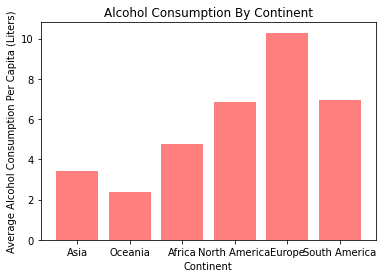

In [25]:
# Define x and y axis
y = [avg_consumption_asia, avg_consumption_oceania, avg_consumption_africa, avg_consumption_north_america, avg_consumption_europe, avg_consumption_south_america ]
x = np.arange(len(y)) 

# Plot bar graph
plt.bar(x, y, color='r', alpha=0.5, align="center")

# Add Labels
tick_locations = [value for value in x]
plt.xticks(tick_locations, ["Asia", "Oceania", "Africa", "North America", "Europe", "South America"])
plt.title("Alcohol Consumption By Continent")
plt.xlabel("Continent")
plt.ylabel("Average Alcohol Consumption Per Capita (Liters)")

###  Part Three  - Consumption & Geography - Region 

###  Part Four  - Economy - Major Exports


In [ ]:
import re 
txt = "The rain in Spain"
x = re.findall("ai", txt)

#### Clean Data

In [28]:
# Look for trends 
df_8['main_export'].value_counts() 

# Merge all exports related to oil and petroleum
df_8['main_export'] = df_8['main_export'].replace({"Crude oil": "Oil"}) 
df_8['main_export'] = df_8['main_export'].replace({"Petroleum": "Oil"}) 
df_8['main_export'] = df_8['main_export'].replace({"Crude oil and petroleum products": "Oil"}) 
df_8['main_export'] = df_8['main_export'].replace({"Oil and gas": "Oil"}) 
df_8['main_export'] = df_8['main_export'].replace({"Fuels and fuel products": "Oil"}) 
df_8['main_export'] = df_8['main_export'].replace({"Petroleum and petroleum products": "Oil"}) 

# Merge all exports related to oil and petroleum
df_8['main_export'] = df_8['main_export'].replace({"Electronic equipment": "Electronic products"}) 
  

<ipython-input-28-4d40c896fe36>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_8['main_export'] = df_8['main_export'].replace({"Crude oil": "Oil"})
<ipython-input-28-4d40c896fe36>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_8['main_export'] = df_8['main_export'].replace({"Petroleum": "Oil"})
<ipython-input-28-4d40c896fe36>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

In [ ]:
df_8.value_counts() 

###  Part Four  - Economy - Industry


In [ ]:
df_8.columns

### Part Five - Correlation & Regression

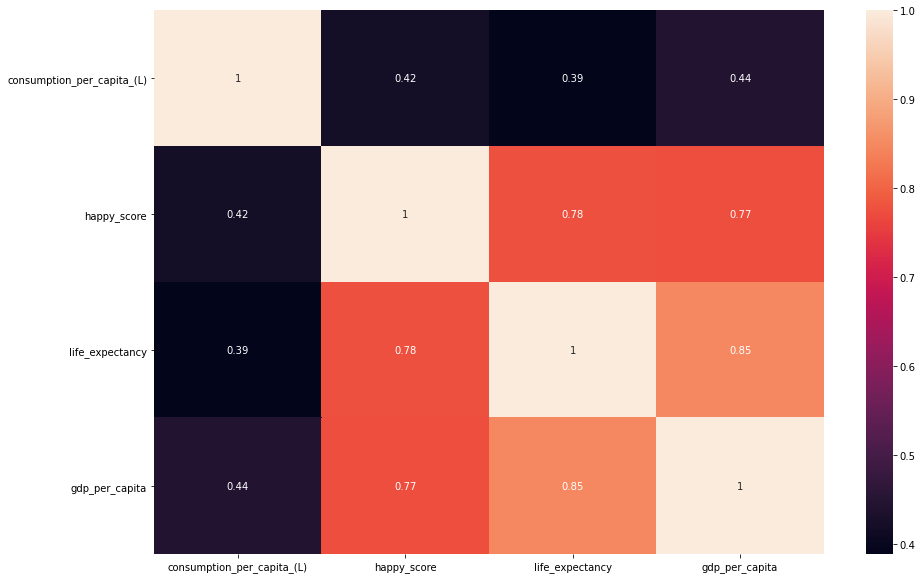

In [30]:
# Explore potential relationships by creating correlation matrix
from matplotlib.pyplot import figure

df_8_corr = df_8.corr()
df_8_corr.unstack().sort_values()

plt.rcParams['figure.figsize'] = (15.0, 10.0)
figure = (sn.heatmap(df_8_corr, annot=True,))



In [52]:
# Save Data to csv
df_10.to_csv("mega_df.csv")
